In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("1974[1].xlsx")

In [5]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1974,17875,59,36,3533
1,1974,17111,86,21,3510
2,1974,17636,212,42,3504
3,1974,17457,20,19,3527
4,1974,17708,376,24,3518
...,...,...,...,...,...
1787,1974,17677,233,21,3512
1788,1974,17805,21,28,3562
1789,1974,17733,258,17,3522
1790,1974,17363,106,27,3503


In [6]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1792, 5)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1792 entries, 0 to 1791
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1792 non-null   int64
 1   Maximum length (m))  1792 non-null   int64
 2   Recession(m),        1792 non-null   int64
 3   Rate/yr(m)           1792 non-null   int64
 4   Snout altitude (m)   1792 non-null   int64
dtypes: int64(5)
memory usage: 70.1 KB


In [8]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [9]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1792


In [10]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [12]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [13]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1974,17875,59,36,3533
1,1974,17111,86,21,3510
2,1974,17636,212,42,3504
3,1974,17457,20,19,3527
4,1974,17708,376,24,3518


In [14]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,0.0046,0.0312,-0.0146
"Recession(m),",NaN,0.0046,1.0000,0.0091,-0.0494
Rate/yr(m),NaN,0.0312,0.0091,1.0000,-0.0098
Snout altitude (m),NaN,-0.0146,-0.0494,-0.0098,1.0000


In [15]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0312
Recession(m),          0.0046
Snout altitude (m)    -0.0146
Year                      NaN
Name: Maximum length (m)), dtype: float64

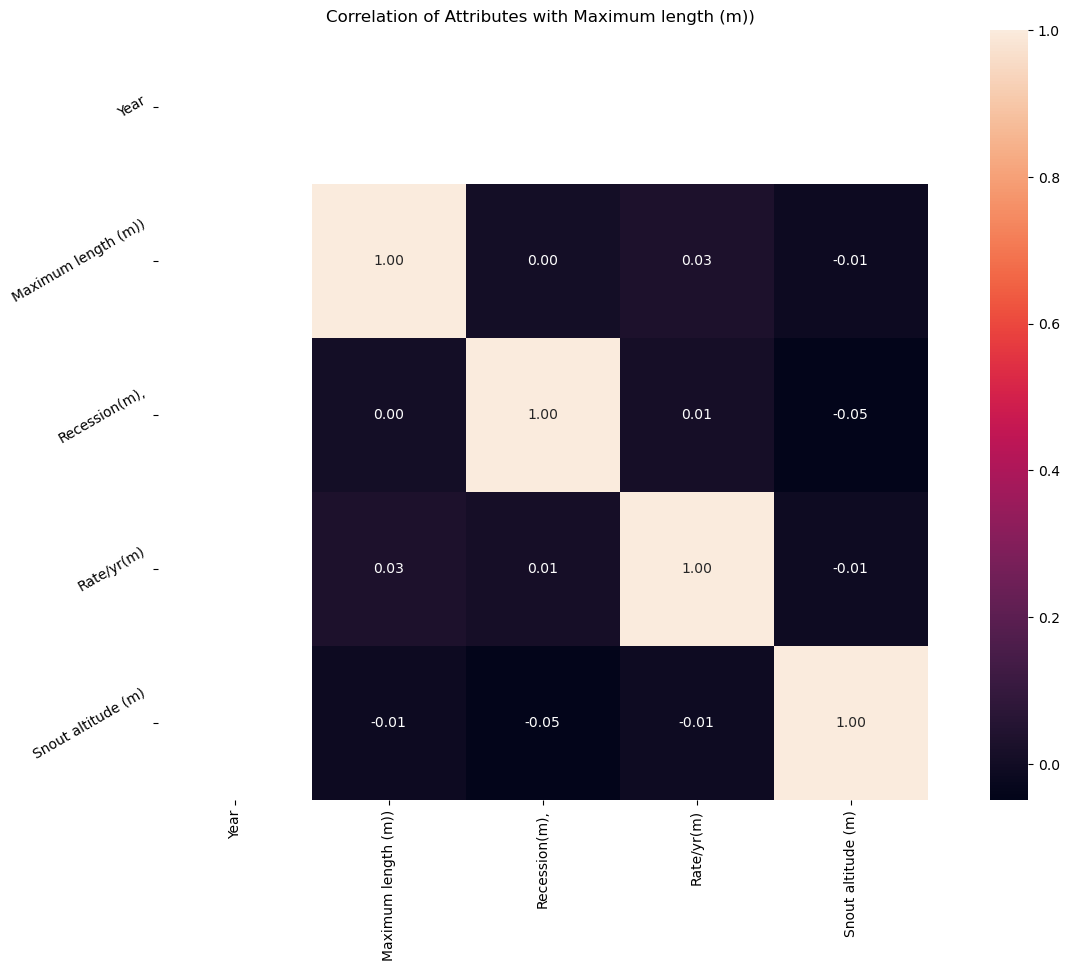

In [16]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [17]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [18]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,792.0000","1,792.0000","1,792.0000","1,792.0000","1,792.0000"
mean,"1,974.0000","17,558.2271",217.4548,27.5223,"3,532.3962"
std,0.0000,297.4779,127.1777,8.5273,20.4674
min,"1,974.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,974.0000","17,298.7500",108.7500,20.0000,"3,515.0000"
50%,"1,974.0000","17,563.0000",213.0000,28.0000,"3,533.0000"
75%,"1,974.0000","17,817.0000",326.2500,35.0000,"3,550.0000"
max,"1,974.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [19]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

1974   1.0000
Name: Year, dtype: float64

40    0.0067
145   0.0061
176   0.0061
206   0.0056
242   0.0056
       ...  
305   0.0006
147   0.0006
416   0.0006
358   0.0006
151   0.0006
Name: Recession(m),, Length: 432, dtype: float64

21   0.0402
19   0.0396
32   0.0385
22   0.0379
20   0.0374
31   0.0374
23   0.0368
29   0.0368
36   0.0363
30   0.0363
40   0.0357
41   0.0346
17   0.0346
24   0.0346
33   0.0335
35   0.0335
42   0.0329
26   0.0324
14   0.0318
28   0.0318
39   0.0318
25   0.0312
16   0.0301
37   0.0296
13   0.0290
15   0.0285
27   0.0285
38   0.0285
18   0.0262
34   0.0240
Name: Rate/yr(m), dtype: float64

3521   0.0212
3558   0.0206
3542   0.0190
3543   0.0190
3513   0.0184
        ...  
3528   0.0089
3522   0.0089
3555   0.0084
3539   0.0078
3496   0.0028
Name: Snout altitude (m), Length: 72, dtype: float64



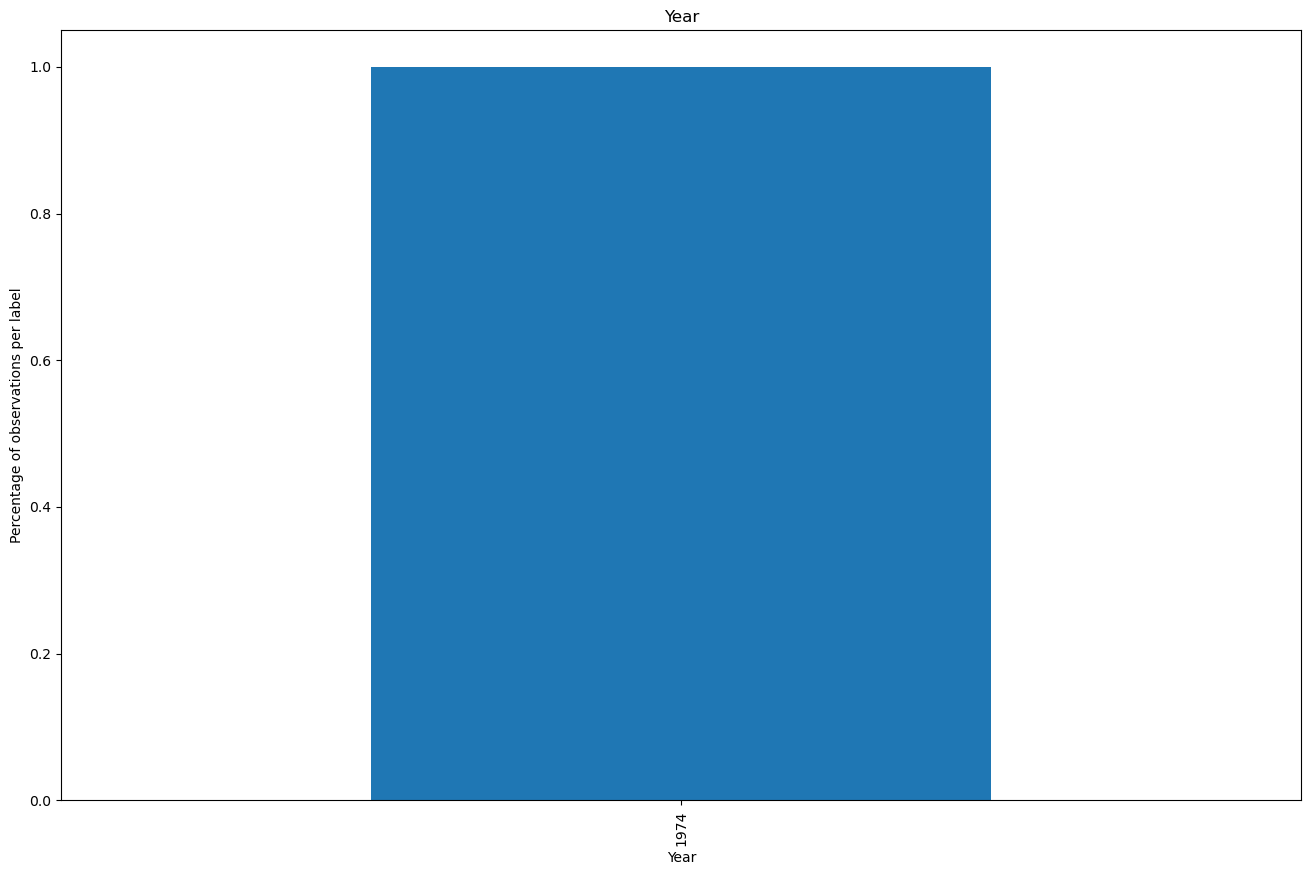

In [ ]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()